In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'C:\Users\fathi\OneDrive\Desktop\portfolio\movies.csv')

In [5]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing*100))

name - 0.0%
rating - 1.004173187271779%
genre - 0.0%
year - 0.0%
released - 0.02608242044861763%
score - 0.03912363067292645%
votes - 0.03912363067292645%
director - 0.0%
writer - 0.03912363067292645%
star - 0.013041210224308816%
country - 0.03912363067292645%
budget - 28.31246739697444%
gross - 2.464788732394366%
company - 0.2217005738132499%
runtime - 0.05216484089723526%


In [4]:
df1 = df.dropna()
df1

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0


In [60]:
#change data types

df1.budget = df1.budget.astype(int)

df1.gross = df1.gross.astype(int)


In [61]:
#correcting release year

df1['yearcorrect'] = df1['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [62]:
df1 = df1.drop('year', axis=1)

In [63]:
#display all rows

#pd.set_option('display.max_rows', None)

In [64]:
df1.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
7480,The Lion King,PG,Animation,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,2019
6653,Jurassic World,PG-13,Action,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,2015
6043,The Avengers,PG-13,Action,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,Parasite,R,Horror,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982
3203,Trojan War,PG-13,Comedy,"October 1, 1997 (Brazil)",5.7,5800.0,George Huang,Andy Burg,Will Friedle,United States,15000000,309,Daybreak,85.0,1997
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,-2147483648,Twentieth Century Fox,194.0,1997
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,-2147483648,Marvel Studios,181.0,2019


In [65]:
#removing duplicates
df1 = df1.drop_duplicates()

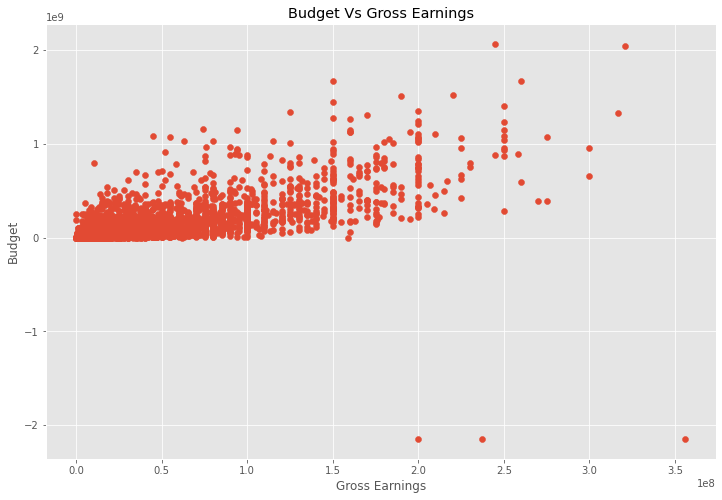

In [66]:
plt.scatter(x=df1.budget, y=df1.gross)

plt.title('Budget Vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

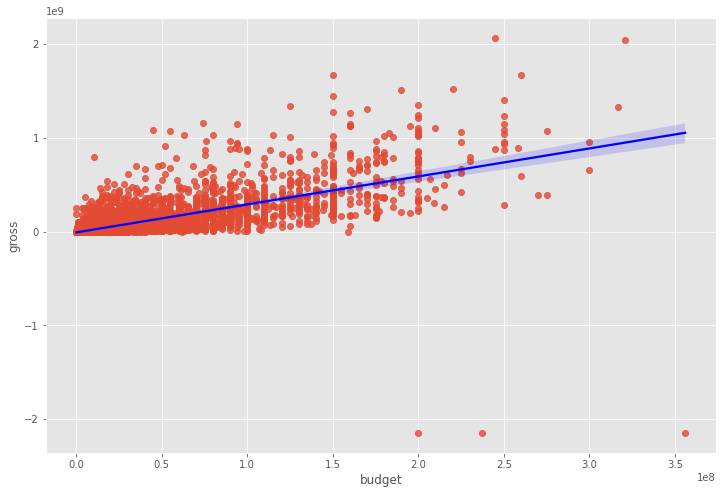

In [38]:
# plot budget vs gross using Seaborn
sns.regplot(x='budget',y='gross', data=df1, line_kws={"color":"blue"})

In [67]:
#Lets start looking at correlation

corr_matrix= df1.corr()


In [31]:
#different methods in correlation - pearson (default), kendall, spearman

df1.corr(method='kendall')

,score,votes,budget,gross,runtime,yearcorrect
score,1.000000,0.350185,-0.006406,0.122862,0.292254,0.043400
votes,0.350185,1.000000,0.346274,0.551440,0.205344,0.293044
budget,-0.006406,0.346274,1.000000,0.509844,0.231278,0.213719
gross,0.122862,0.551440,0.509844,1.000000,0.174775,0.231587
runtime,0.292254,0.205344,0.231278,0.174775,1.000000,0.064793
yearcorrect,0.043400,0.293044,0.213719,0.231587,0.064793,1.000000


Text(87.0, 0.5, 'Numeric Variables')

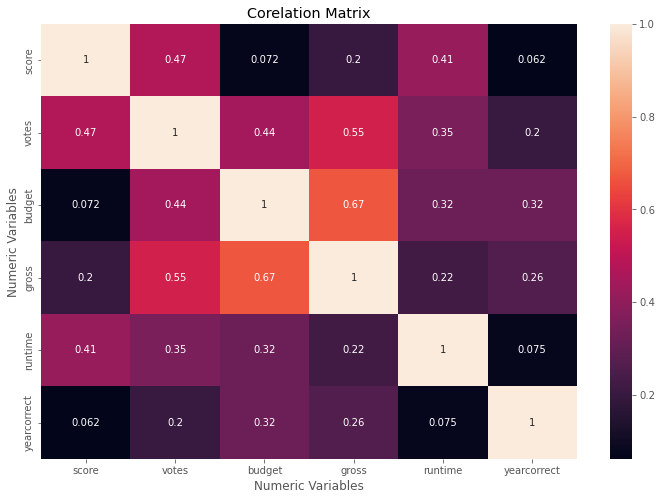

In [35]:
sns.heatmap(corr_matrix, annot=True)
plt.title('Corelation Matrix')

plt.xlabel('Numeric Variables')

plt.ylabel('Numeric Variables')

In [5]:
df2=df1
df2

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0


In [18]:
df_numerized = df1


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4692,6,6,1980,1304,8.4,927000.0,1795,2832,699,46,19000000.0,46998772.0,1426,146.0
1,3929,6,1,1980,1127,5.8,65000.0,1578,1158,214,47,4500000.0,58853106.0,452,104.0
2,3641,4,0,1980,1359,8.7,1200000.0,757,1818,1157,47,18000000.0,538375067.0,945,124.0
3,204,4,4,1980,1127,7.7,221000.0,889,1413,1474,47,3500000.0,83453539.0,1108,88.0
4,732,6,4,1980,1170,7.3,108000.0,719,351,271,47,6000000.0,39846344.0,1083,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,415,6,0,2020,904,6.6,140000.0,16,2390,1812,47,90000000.0,426505244.0,452,124.0
7649,3556,4,0,2020,713,6.5,102000.0,852,2309,147,47,85000000.0,319715683.0,1108,99.0
7650,1153,4,1,2020,904,5.6,53000.0,1809,2827,1470,47,175000000.0,245487753.0,1397,101.0
7651,3978,4,1,2020,758,6.8,42000.0,294,2091,640,6,135000000.0,111105497.0,12,100.0


Text(87.0, 0.5, 'Numeric Variables')

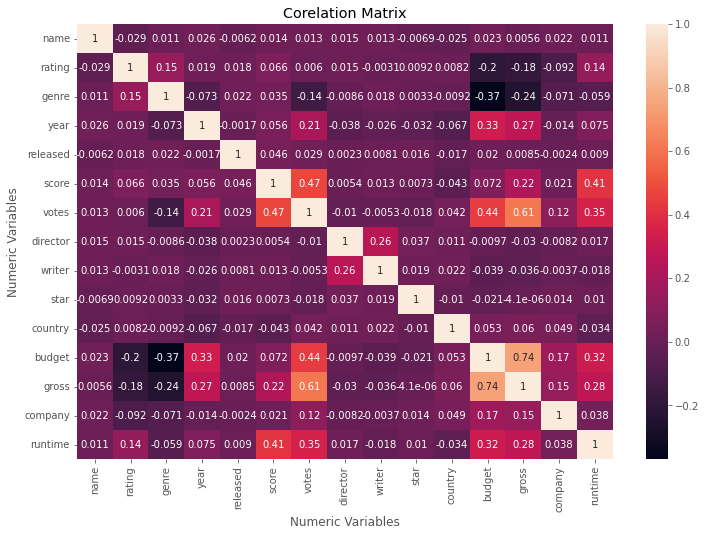

In [8]:
corr_matrix= df_numerized.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Corelation Matrix')

plt.xlabel('Numeric Variables')

plt.ylabel('Numeric Variables')

In [25]:
corr_matrix= df_numerized.corr()

corr_pairs = corr_matrix.unstack()

corr_pairs.sort_values()

budget    genre      -0.368523
genre     budget     -0.368523
          gross      -0.244101
gross     genre      -0.244101
budget    rating     -0.203946
rating    budget     -0.203946
          gross      -0.181906
gross     rating     -0.181906
genre     votes      -0.135990
votes     genre      -0.135990
company   rating     -0.092357
rating    company    -0.092357
genre     year       -0.073167
year      genre      -0.073167
genre     company    -0.071334
company   genre      -0.071334
year      country    -0.066748
country   year       -0.066748
genre     runtime    -0.059237
runtime   genre      -0.059237
country   score      -0.043051
score     country    -0.043051
budget    writer     -0.039466
writer    budget     -0.039466
director  year       -0.038354
year      director   -0.038354
writer    gross      -0.035885
gross     writer     -0.035885
country   runtime    -0.034477
runtime   country    -0.034477
star      year       -0.032157
year      star       -0.032157
director

In [24]:
pd.set_option('display.max_rows', None)

In [27]:
corr_pairs[corr_pairs>0.4].sort_values()

score     runtime     0.414068
runtime   score       0.414068
votes     budget      0.439675
budget    votes       0.439675
score     votes       0.474256
votes     score       0.474256
gross     votes       0.614751
votes     gross       0.614751
gross     budget      0.740247
budget    gross       0.740247
name      name        1.000000
company   company     1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
director  director    1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
star      star        1.000000
runtime   runtime     1.000000
dtype: float64

# votes and budget have the highest correlation to gross earnings.